In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose

IMAGE_SIZE = 160

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2DTranspose(64,(2, 2),strides=2,padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2DTranspose(32,(2, 2),strides=2,padding='same'))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2DTranspose(16,(2, 2),strides=2,padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 80, 80, 64)        1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 80, 80, 128)       73856     
                                                                 
 conv2d_14 (Conv2D)          (None, 40, 40, 128)       147584    
                                                                 
 conv2d_15 (Conv2D)          (None, 40, 40, 256)       295168    
                                                                 
 conv2d_16 (Conv2D)          (None, 20, 20, 256)       590080    
                                                                 
 conv2d_17 (Conv2D)          (None, 20, 20, 512)       1180160   
                                                                 
 conv2d_18 (Conv2D)          (None, 20, 20, 512)      

In [7]:
# !unzip -uq "/content/drive/MyDrive/colab/hoc lai/gray_color/color_1001.zip" -d "/content/drive/MyDrive/colab/hoc lai/gray_color/color"

In [8]:
# !unzip -uq "/content/drive/MyDrive/colab/hoc lai/gray_color/gray_1001.zip" -d "/content/drive/MyDrive/colab/hoc lai/gray_color/gray"

In [11]:
import os
import cv2

path_color = '/content/drive/MyDrive/colab/hoc lai/gray_color/color'
color_image = []

for i in sorted(os.listdir(path_color)):
  img = cv2.imread(path_color + '/' + i)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
  img = img.astype('float32') / 255.0
  color_image.append(img)

path_gray = '/content/drive/MyDrive/colab/hoc lai/gray_color/gray'
gray_image = []

for i in sorted(os.listdir(path_gray)):
  img = cv2.imread(path_gray + '/' + i)
  img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
  img = img.astype('float32') / 255.0
  gray_image.append(img)

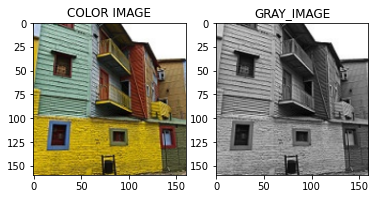

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1,2,1)
plt.title('COLOR IMAGE')
plt.imshow(color_image[1])

plt.subplot(1,2,2)
plt.title('GRAY_IMAGE')
plt.imshow(gray_image[1])

plt.show()

In [13]:
import numpy as np

x = np.array(gray_image)
y = np.array(color_image)

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2)

In [14]:
print(x_train.shape)
print(y_train.shape)

(800, 160, 160, 3)
(800, 160, 160, 3)


In [15]:
H = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

25/25 [==============================] - 8s 337ms/step - loss: 0.0117 - accuracy: 0.4692 - val_loss: 0.0117 - val_accuracy: 0.4562
Epoch 27/50
25/25 [==============================] - 9s 342ms/step - loss: 0.0122 - accuracy: 0.4623 - val_loss: 0.0115 - val_accuracy: 0.4133
Epoch 28/50
25/25 [==============================] - 8s 340ms/step - loss: 0.0115 - accuracy: 0.4728 - val_loss: 0.0130 - val_accuracy: 0.4020
Epoch 29/50
25/25 [==============================] - 8s 335ms/step - loss: 0.0117 - accuracy: 0.4698 - val_loss: 0.0121 - val_accuracy: 0.4641
Epoch 30/50
25/25 [==============================] - 8s 334ms/step - loss: 0.0111 - accuracy: 0.4753 - val_loss: 0.0110 - val_accuracy: 0.4825
Epoch 31/50
25/25 [==============================] - 8s 338ms/step - loss: 0.0116 - accuracy: 0.4596 - val_loss: 0.0118 - val_accuracy: 0.4616
Epoch 32/50
25/25 [==============================] - 8s 334ms/step - loss: 0.0109 - accuracy: 0.4816 - val_loss: 0.0107 - val_accuracy: 0.4547
Epoch 33/50

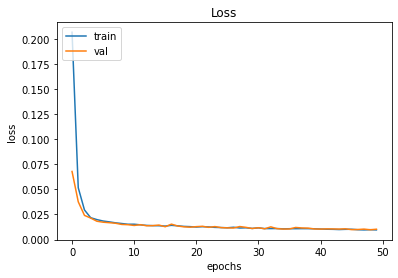

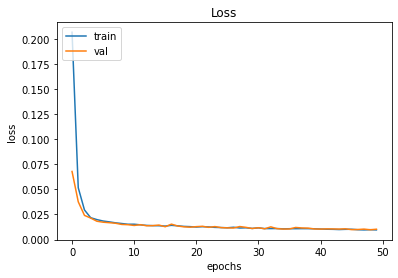

In [16]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.legend(['train', 'val'], loc='upper left')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.legend(['train', 'val'], loc='upper left')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

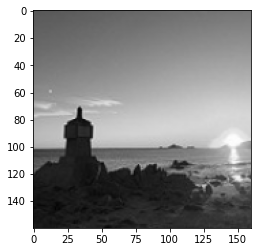

In [19]:
x_test = []
img_test = cv2.imread('/content/drive/MyDrive/colab/hoc lai/gray_color/2790_gray.jpg')
img_test = cv2.resize(img_test, (160,160))
img_test = img_test.astype('float32') / 255.0
x_test.append(img_test)

plt.imshow(x_test[0])

In [20]:
x_test = np.array(x_test)
y_pred = model.predict(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


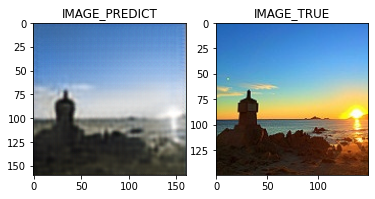

In [23]:
plt.figure()
plt.subplot(1,2,1)
plt.title('IMAGE_PREDICT')
plt.imshow(y_pred[0])
y_test = cv2.imread('/content/drive/MyDrive/colab/hoc lai/gray_color/2790.jpg')
y_test = cv2.cvtColor(y_test, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,2)
plt.title('IMAGE_TRUE')
plt.imshow(y_test)